In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [ ]:
dataframe1 = pd.read_csv ('/content/sales2019_1.csv')
dataframe2 = pd.read_csv ('/content/sales2019_2.csv')
dataframe3 = pd.read_csv ('/content/sales2019_3.csv')
dataframe4 = pd.read_csv ('/content/sales2019_4.csv')
dataframe5 = pd.read_csv ('/content/sales2019_5.csv')
dataframe6 = pd.read_csv ('/content/sales2019_6.csv')
dataframe7 = pd.read_csv ('/content/sales2019_7.csv')
dataframe8 = pd.read_csv ('/content/sales2019_8.csv')
dataframe9 = pd.read_csv ('/content/sales2019_9.csv')
dataframe10 = pd.read_csv ('/content/sales2019_10.csv')
dataframe11 = pd.read_csv ('/content/sales2019_11.csv')
dataframe12 = pd.read_csv ('/content/sales2019_12.csv')

df = pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6,dataframe7,dataframe8,dataframe9,dataframe10,dataframe11,dataframe12])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


#Thang nao ban duoc nhieu nhat

In [ ]:
df['Month'] = df['Order Date'].str[0:2] #them cot month vao dataframe va gan gia tri la 2 phan tu dau trong order date
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
print(set(df['Month']))

{'04', '09', '01', '03', '06', '11', '02', '08', '10', '05', '12', '07'}


In [ ]:
df = df.dropna(how='all') #drop gia tri NaN co trong dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df = df[df['Month'] != 'Or'] #loai bo gia tri Or trong cot month

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='integer')

In [ ]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] #tao cot sale moi co gt = QO*PE
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [ ]:
#chuyen cot sale sang canh price each
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [ ]:
sales_value = df.groupby('Month').sum()['Sales']


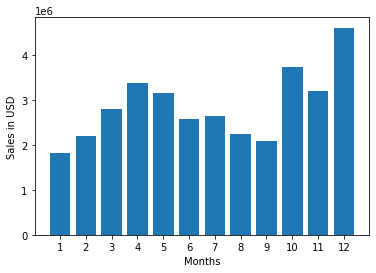

In [ ]:
months= range(1,13)
plt.bar(x=months,height = sales_value) #tao barchart voi truc x la month, y la sales value
plt.xticks(months) #de barchart hien gia tri thang le
plt.xlabel('Months') #them ten cho truc x
plt.ylabel('Sales in USD') #them ten cho truc y
plt.show() #show barchart

#Thanh pho nao ban duoc nhieu nhat

In [ ]:
address_to_city = lambda address:address.split(',')[1] #tao 1 function de lay city tu address

In [ ]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [ ]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [ ]:
sales_value_city = df.groupby('City').sum()['Sales']

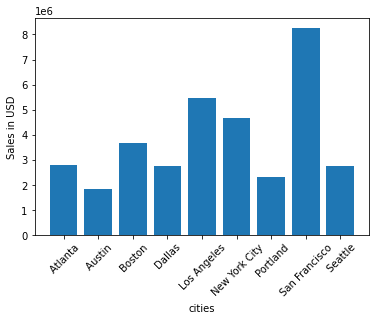

In [ ]:
cities = [city for city, sales in sales_value_city.items()]
plt.bar(cities,sales_value_city) 
plt.xticks(cities,rotation = 45) 
plt.xlabel('cities') #them ten cho truc x
plt.ylabel('Sales in USD') #them ten cho truc y
plt.show() #show barchart

#Gio nao co nhieu so order nhat

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #convert order date sang datatype datetime

In [ ]:
df['Hours'] = df['Order Date'].dt.hour #tach hour tu cot order date


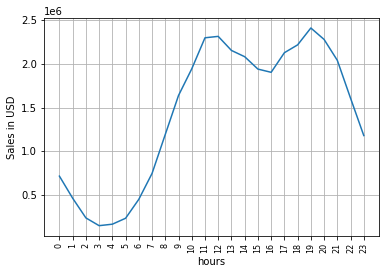

In [ ]:
#plot theo revenue trong tung h
sale_value_hours = df.groupby('Hours').sum()['Sales']
hours = [hour for hour, sales in sale_value_hours.items()]
plt.plot(hours, sale_value_hours) 
plt.grid()
plt.xticks(hours,rotation = 90, size = 8) 
plt.xlabel('hours') #them ten cho truc x
plt.ylabel('Sales in USD') #them ten cho truc y
plt.show() #show barchart

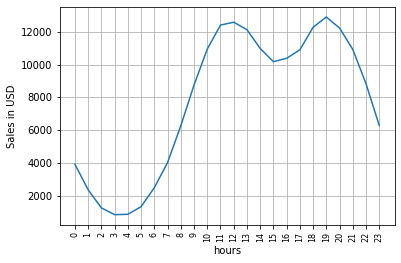

In [ ]:
#plot theo so don hang trong 1h
sale_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sale_value_hours.items()]
plt.plot(hours, sale_value_hours) 
plt.grid() #them grid vao trong graph
plt.xticks(hours,rotation = 90, size = 8) 
plt.xlabel('hours') #them ten cho truc x
plt.ylabel('Sales in USD') #them ten cho truc y
plt.show() #show barchart

#Tim nhung don hang duoc mua cung nhau

In [ ]:
df_dup = df[df['Order ID'].duplicated(keep=False)] #syntax tim nhung cot bi lap trong dataframe
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [ ]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(','.join) #join nhung don hang giong nhau vao cung 1 hang
df_dup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [ ]:
df_dup[['Order ID', 'All Products']].drop_duplicates()

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [ ]:
df_dup['All Products'].value_counts().head(10) #in ra so gia tri xuat hien trong tung hang

iPhone,Lightning Charging Cable                       1764
Google Phone,USB-C Charging Cable                     1712
iPhone,Wired Headphones                                722
Vareebadd Phone,USB-C Charging Cable                   624
Google Phone,Wired Headphones                          606
iPhone,Apple Airpods Headphones                        572
Google Phone,Bose SoundSport Headphones                322
Google Phone,USB-C Charging Cable,Wired Headphones     231
Vareebadd Phone,Wired Headphones                       208
iPhone,Lightning Charging Cable,Wired Headphones       168
Name: All Products, dtype: int64

#San pham nao duoc ban nhieu nhat

> Indented block



In [ ]:
all_products = df.groupby('Product').sum()['Quantity Ordered']

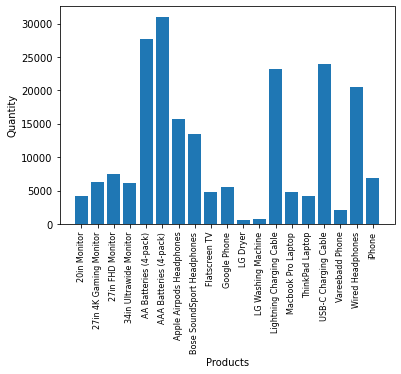

In [ ]:
product_ls = [product for product, quant in all_products.items()]
plt.bar(product_ls,all_products)
plt.xticks(product_ls,rotation=90,size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()